In [1]:
pip install wordcloud



     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00


In [34]:
#importing necessary libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer


In [35]:
import pandas as pd
import numpy as np
import re

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

In [38]:
df=pd.read_excel('Group3-news-text-sanitized (1).xlsx') #reading the file

In [39]:
df = df.drop_duplicates('Tweet',keep='first') # dropping the duplicate tweets
df['Tweet'].count()

10138

In [40]:
df["Cleaned_Tweet"] = [re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", v.lower()) for v in df["Tweet"]] #cleaning then data
df

,Category,Confidence,Tweet,Cleaned_Tweet
0,Not Relevant,1.0000,Hey! How are you?,hey how are you
1,Not Relevant,1.0000,What's up man?,whats up man
2,Not Relevant,1.0000,I love fruits,i love fruits
3,Not Relevant,1.0000,Summer is lovely,summer is lovely
4,Not Relevant,1.0000,My car is so fast,my car is so fast
...,...,...,...,...
10318,Relevant,0.3994,Make man pikin crash ??????,make man pikin crash
10319,Relevant,0.3994,Disregard my snap story there is an angry whit...,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,#tornado #singapore Mac and #cheese #around th...,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,Check out more data on Upper Wabash reservoirs...,check out more data on upper wabash reservoirs...


In [41]:
#Writing a funtion for data pre-processing.
def data_preprocessing(data):
    Cleaned_tweets = re.sub(r'https?://\S+|www\.\S+|#\w+|\@\w+|\d+|[^\w\s]', '', data.lower())
    words=word_tokenize(Cleaned_tweets) #So here we are tokenizing the text data.
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]# Removing the stop wors form the data.
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]#lemmatizing the data.To put it simple lemmatization is replacing the word with its root form.
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [42]:
df.drop('Tweet',axis=1) #dropping the actual column of tweets

,Category,Confidence,Cleaned_Tweet
0,Not Relevant,1.0000,hey how are you
1,Not Relevant,1.0000,whats up man
2,Not Relevant,1.0000,i love fruits
3,Not Relevant,1.0000,summer is lovely
4,Not Relevant,1.0000,my car is so fast
...,...,...,...
10318,Relevant,0.3994,make man pikin crash
10319,Relevant,0.3994,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,check out more data on upper wabash reservoirs...


In [43]:
vals_to_replace = {'Relevant':1, 'Not Relevant':0} # Define a dictionary to map the string values to their corresponding integer replacements
# Use the 'map()' function to replace values in the 'Category' column of the DataFrame 'df'
# The map() function applies the replacements specified in the 'vals_to_replace' dictionary to each element of the 'Category' column.
df['Category'] = df['Category'].map(vals_to_replace)
# After running this code, the 'Category' column in the DataFrame 'df' will have its string values replaced with corresponding integer values based on the 'vals_to_replace' dictionary.
# For example, if the original 'Category' column had 'Relevant' and 'Not Relevant' as its values, they will be replaced with 1 and 0, respectively.
# Other values in the 'Category' column will remain unchanged.


In [44]:
df.dropna(inplace=True) 

In [45]:
df['Category'].unique()

array([0., 1.])

In [46]:
# Split the DataFrame 'df' into training and testing sets for input features ('Cleaned_Tweet') and target labels ('Category')
# test_size=0.2 specifies that 20% of the data will be used for testing, and 80% will be used for training
# random_state=42 sets a specific seed value for the random number generator, ensuring reproducibility of the split
# This means that every time this code is run with random_state=42, the same random split will be generated.
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweet'], df['Category'], test_size=0.2, random_state=42)
# X_train: This contains 80% of the 'Cleaned_Tweet' data and will be used for training the model.
# X_test: This contains the remaining 20% of the 'Cleaned_Tweet' data and will be used for evaluating the model's performance.
# y_train: This contains the corresponding target labels (0 or 1) for the tweets in X_train and will be used during training.
# y_test: This contains the corresponding target labels (0 or 1) for the tweets in X_test and will be used for evaluating the model's performance.

In [47]:
tokenizer = Tokenizer() #Initialize a new Tokenizer object
tokenizer.fit_on_texts(X_train)  # Fit the Tokenizer on the training data (X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train) # Convert the text data in X_train to sequences of integers
X_test_sequences = tokenizer.texts_to_sequences(X_test) # Convert the text data in X_test to sequences of integers
# X_train_sequences: This contains the training data (tweets) represented as sequences of integers, where each integer represents a unique word in the tokenizer's vocabulary.
# X_test_sequences: This contains the testing data (tweets) represented as sequences of integers using the same tokenizer's vocabulary as X_train_sequences.

In [48]:
max_sequence_length = 100  # Define the maximum sequence length to which the sequences will be padded
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length) # Pad the sequences in X_train_sequences to ensure they all have the same length (max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length) # Pad the sequences in X_test_sequences to ensure they all have the same length (max_sequence_length)
# Padding ensures that all input sequences have the same length, which is essential for efficient batch processing during model training and evaluation.

In [49]:
from keras.layers import Dense, Activation, Flatten,Dropout #importing dense, activation, flatten and dropout layers from keras

In [50]:
model = Sequential() # Create a sequential model
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length=max_sequence_length))  # Add the Embedding layer
model.add(LSTM(64, return_sequences=True)) # Add the first LSTM layer with return_sequences=True
model.add(LSTM(64)) # Add the second LSTM layer without returning sequences (outputting only the final LSTM state)
model.add(Dense(1, activation='sigmoid')) # Add the final Dense layer with one neuron and a sigmoid activation function for binary classification

In [51]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model with the specified loss function, optimizer, and evaluation metrics
# binary_crossentropy is the loss function used for binary classification tasks
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)  # Train the model on the training data (X_train_padded) and corresponding labels (y_train)
# epochs=5 specifies the number of times the model will iterate over the entire training dataset during training.
# batch_size=32 specifies the number of samples per gradient update. The model's weights are updated after processing each batch.

Epoch 1/5
254/254 [==============================] - 38s 124ms/step - loss: 0.5253 - accuracy: 0.7411 - val_loss: 0.4364 - val_accuracy: 0.8064
Epoch 2/5
254/254 [==============================] - 30s 119ms/step - loss: 0.3208 - accuracy: 0.8685 - val_loss: 0.4429 - val_accuracy: 0.8030
Epoch 3/5
254/254 [==============================] - 30s 118ms/step - loss: 0.2040 - accuracy: 0.9254 - val_loss: 0.5063 - val_accuracy: 0.8069
Epoch 4/5
254/254 [==============================] - 30s 118ms/step - loss: 0.1404 - accuracy: 0.9505 - val_loss: 0.5433 - val_accuracy: 0.7886
Epoch 5/5
254/254 [==============================] - 30s 119ms/step - loss: 0.1138 - accuracy: 0.9616 - val_loss: 0.6288 - val_accuracy: 0.7822


ANALYSIS:
According to our DNN model ,it seems that the model is performing quite well on the training data, achieving high accuracy and ROC-AUC scores. However, the test accuracy and ROC-AUC scores are slightly lower, which suggests that the model may be slightly overfitting. so we are working on OVERFITTING, considering Regularization, Hyperparameter Tuning and Reducing the complexity of model.

The training accuracy increases with each epoch, reaching 0.9649 (or approximately 96.49%) at the end of the 5th epoch.

The training loss decreases with each epoch, indicating that the model is learning from the training data.

However, the validation accuracy (val_accuracy) and validation loss (val_loss) show fluctuations and do not improve consistently. The validation accuracy reaches 0.7842 (or approximately 78.42%) at the end of the 5th epoch.

This discrepancy between training accuracy and validation accuracy, along with the fluctuation in validation accuracy, suggests that the model may be overfitting to some extent.

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix #importing the auc curve, roc curve and confusion matrix 

In [56]:
y_pred = model.predict(X_test_padded) # Predict the probabilities for the positive class (class 1) using the trained model and the testing data (X_test_padded)
auc = roc_auc_score(y_test, y_pred)  # Calculate the ROC AUC score by comparing the predicted probabilities (y_pred) to the true labels (y_test).
print("AUC:", auc) #printing accuracy

64/64 [==============================] - 2s 37ms/step
AUC: 0.8396111195716645


In [57]:
import matplotlib.pyplot as plt #importing the plotting library

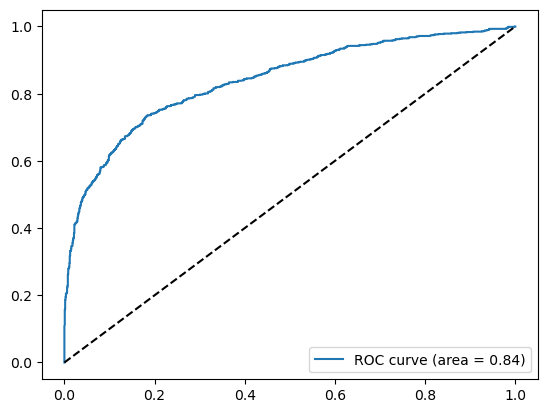

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Compute the ROC curve by comparing the predicted probabilities (y_pred) to the true labels (y_test).
plt.figure() # Create a new figure to plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc) # Plot the ROC curve using the false positive rate (fpr) on the x-axis and the true positive rate (tpr) on the y-axis.
plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal line representing the ROC curve for a random classifier.
plt.legend(loc="lower right") # Add a legend to the plot, placing it in the lower right corner.
plt.show() #displaying the graph

the AUC value for the ROC curve is approximately 0.84. This indicates that the DNN model has a reasonably good ability to discriminate between relevant and not relevant tweets. An AUC value of 0.5 represents random guessing, and the model's AUC being significantly higher than 0.5 indicates that it performs better than random chance.

In [ ]:
now, in week 12 I have worked on overfitting will add that in week12